In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
num = 3
qr = QuantumRegister(num)
cr = ClassicalRegister(num)

circuit = QuantumCircuit(qr, cr)

In [3]:
for q in range(len(qr)):
  circuit.h(qr[q])

In [4]:
circuit.measure(qr, cr)

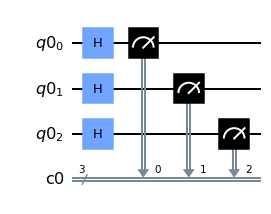

In [5]:
circuit.draw(output="mpl")

In [6]:
from qiskit import BasicAer
from qiskit.tools.monitor import job_monitor
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#backend = provider.get_backend('qasm_simulator')
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend=backend, shots=2048)
job_monitor(job)

Job Status: job has successfully run


{'000': 235, '001': 264, '111': 261, '101': 243, '011': 269, '010': 252, '100': 271, '110': 253}


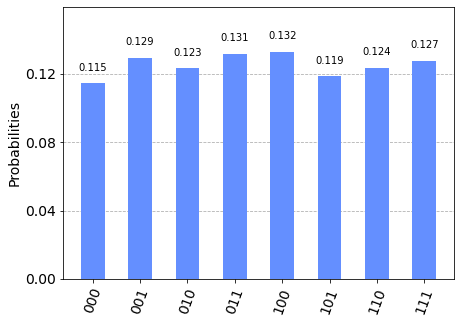

In [7]:
result = job.result()
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
res = result.get_counts(circuit)
print(res)
plot_histogram(res)
#La aleatoriedad de los números generados depende de la aleatoriedad de la distribución de médida
#de cada estado cuántico base, dentro del total de "shots" llevados a cabo.

In [8]:
numbers = []
for attr, value in res.items():
  numQ = 0
  i = 0
#  print("value=",value)
#  print("attr=",attr)
  for ch in attr:
#    print("ch=",ch)
#    print("i=", i)    
    if ch == '1':
      numQ += 2**i
    i = i + 1
  numbers.append(numQ)
#  print("numQ=",numQ)
print("numbers=",numbers)

numbers= [0, 4, 7, 5, 6, 2, 1, 3]


In [ ]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(circuit, backend=backend, shots=10)
job_monitor(job)

Job Status: job is queued (22)    

In [ ]:
result = job.result()
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
res = result.get_counts(circuit)
print(res)
plot_histogram(res)

In [ ]:
numbers = []
for attr, value in res.items():
  numQ = 0
  i = 0
  for ch in attr:
    if ch == '1':
      numQ += 2**i
    i = i + 1
  numbers.append(numQ)
print("numbers=",numbers)